In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

## 生成数据

In [4]:
# Create sample x_i
x = np.array([2.0, 1.0, 0.5, -1.0, -2.0, 0.8, -0.5])
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## 计算solftmax

- 第一步：计算 $e^{x_i}$ 和 $\sum_{i=1}^{n} e^{x_i}$

In [5]:
exp_x = np.exp(x)
exp_x

array([7.3890561 , 2.71828183, 1.64872127, 0.36787944, 0.13533528,
       2.22554093, 0.60653066])

In [6]:
np.sum(exp_x)

np.float64(15.091345510702979)

- 第二步：计算$$\frac{e^{x_j}}{\sum_{i=1}^{n} e^{x_i}}$$

In [7]:
exp_x / np.sum(exp_x)

array([0.48962209, 0.1801219 , 0.10924945, 0.02437685, 0.00896774,
       0.14747134, 0.04019063])

- 考虑温度

In [8]:
temperature = 1.5

exp_x_temperature = np.exp(x / temperature)
exp_x_temperature / np.sum(exp_x_temperature)

array([0.36706409, 0.18845699, 0.13503533, 0.04967672, 0.02550488,
       0.16493253, 0.06932945])

## 可视化

In [9]:
# Define softmax function with temperature
def softmax(x, temperature=1.0):
    x = x - np.max(x)  # Numerical stability
    exp_x = np.exp(x / temperature)
    return exp_x / np.sum(exp_x)

In [10]:
def plot_softmax(temperature=1.0):
    probabilities = softmax(x, temperature)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(categories, probabilities, color='skyblue', edgecolor='navy', alpha=0.8)
    
    # plt.ylim(0, max(probabilities) * 1.15)
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.xlabel('Category')
    plt.title(f'Softmax Distribution (Temperature = {temperature:.2f})')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add probability labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

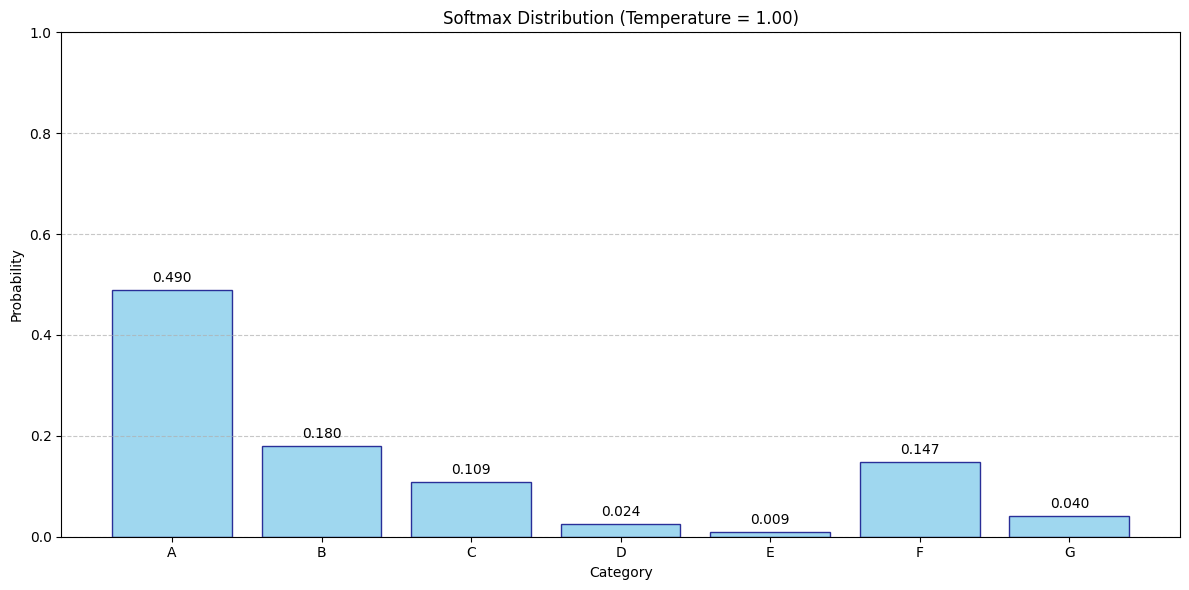

In [11]:
plot_softmax()

- 动态交互：

In [12]:
# Create interactive widget
interact(plot_softmax, 
         temperature=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, 
                               description='Temperature:'))

interactive(children=(FloatSlider(value=1.0, description='Temperature:', max=10.0, min=0.1), Output()), _dom_c…

<function __main__.plot_softmax(temperature=1.0)>